In [1]:
%load_ext autoreload
%autoreload 2

import pymc4 as pm
import tensorflow as tf
import numpy as np
import seaborn as sns
import arviz as az

%matplotlib inline

In [2]:
Y = tf.concat([tf.random.normal((100,)), (tf.random.normal((300,)) + 3.)], 0)

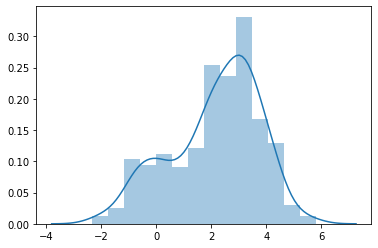

In [3]:
sns.distplot(Y)

In [10]:
Y = tf.random.normal((400,2))*1+3

In [ ]:
#Y = tf.tile(Y, tf.constant([1,5000]))

In [12]:
@pm.model()
def model():
    b0 = yield pm.Normal("b0", 0, [2., 3.])
    x = yield pm.Normal("x", b0, 1, observed=Y)
    return x

In [13]:
x = pm.sample_smc(model())

> /home/rasul/Desktop/forks/gsoc/pymc4/pymc4/flow/executor.py(239)collect_log_prob_smc()
-> log_prob = sum(log_prob_elemwise)
(Pdb) distrs["model/x"]
(Pdb) self.all_values
ChainMap({'model/b0': <tf.Tensor: shape=(5000, 2), dtype=float32, numpy=
array([[ 1.671819  , -2.1387331 ],
       [-0.34914923,  2.2073808 ],
       [ 1.9313518 , -1.3793237 ],
       ...,
       [ 1.120329  ,  1.0303875 ],
       [ 2.0810328 ,  3.399853  ],
       [-1.0262574 , -2.9301887 ]], dtype=float32)>}, {}, {'model/x': <tf.Tensor: shape=(5000, 400, 2), dtype=float32, numpy=
array([[[2.6919863, 3.1295276],
        [2.3448832, 2.753059 ],
        [0.2798741, 2.3698993],
        ...,
        [2.0693986, 2.176312 ],
        [3.7799377, 2.6964102],
        [2.1820848, 3.0579731]],

       [[2.6919863, 3.1295276],
        [2.3448832, 2.753059 ],
        [0.2798741, 2.3698993],
        ...,
        [2.0693986, 2.176312 ],
        [3.7799377, 2.6964102],
        [2.1820848, 3.0579731]],

       [[2.6919863, 3.129527

BdbQuit: 

In [ ]:
sns.distplot(x[0])

In [ ]:
pm.Normal.dist(0, [1.,2., 3.]).log_prob(tf.ones((10,3)))

In [ ]:
@pm.model()
def model():
    b0 = yield pm.Normal("b0", 0, 1)
    b1 = yield pm.Normal("b1", 0, 1)
    mean0 = yield pm.Normal("mean0", 0, 1)
    mean1 = yield pm.Normal("mean1", 0, 1)
    print(mean0.shape)
    x = yield pm.Mixture("x", 
            tf.stack([b0, b1], -1), 
            [
                pm.Normal.dist(loc=mean0, scale=1.), 
                pm.Normal.dist(loc=mean1, scale=1.)
            ],
            observed=Y,
        )
    return x

In [ ]:
sns.distplot(x)

In [ ]:
pm.Normal("fd", loc=0, scale=[1.,2.]).log_prob(tf.ones((2,),  dtype=tf.float32))

In [ ]:
trace = pm.sample(model(), progressbar=False)

In [ ]:
trace = pm.sample(model(), progressbar=True)

In [ ]:
az.plot_trace(trace)

In [ ]:
@pm.model()
def model():
    b0 = yield pm.Normal("b0", 0, 1, batch_stack=2)
    print(b0.shape)
    return x

In [ ]:
pm.sample_smc(model())

In [ ]:
import itertools
a = (10, 2, 3)
b = ()
broadcast_shapes(a, b)

In [ ]:
pl = [pm.Normal.dist(0, 1)._distribution, pm.Normal.dist(0, 1)._distribution]

In [ ]:
pl[0].batch_shape

In [ ]:
a = tf.ones((1,2,))

In [ ]:
def broadcast_shapes(*shapes):
    """Apply numpy broadcasting rules to shapes."""
    result = []
    for dims in itertools.zip_longest(*map(reversed, shapes), fillvalue=1):
        dim: int = 1
        for d in dims:
            if dim != 1 and d != 1 and d != dim:
                raise ValueError("Shapes can't be broadcasted")
            elif d > dim:
                dim = d
        result.append(dim)
    return tuple(reversed(result))

In [ ]:
broadcast_shapes(a.shape,a.shape)